In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

In [2]:
clean_ecar_df = pd.read_csv("../clean_ecar_dataset.csv")
clean_ecar_df.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€,Pricein£
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


In [3]:
clean_ecar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           180 non-null    object 
 1   Model                  180 non-null    object 
 2   Subtitle(kWh)          180 non-null    float64
 3   Acceleration(sec)      180 non-null    float64
 4   TopSpeed (km/h)        180 non-null    int64  
 5   Range(km)              180 non-null    int64  
 6   Efficiency(Wh/km)      180 non-null    int64  
 7   FastChargeSpeed(km/h)  180 non-null    int64  
 8   Drive                  180 non-null    object 
 9   NumberofSeats          180 non-null    int64  
 10  Pricein€               180 non-null    int64  
 11  Pricein£               180 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


In [4]:
clean_ecar_df.groupby('Manufacturer').mean()['Range(km)']

Manufacturer
Aiways        335.000000
Audi          359.411765
BMW           375.714286
Byton         371.666667
CUPRA         355.000000
Citroen       223.333333
DS            250.000000
Dacia         170.000000
Fiat          226.250000
Ford          389.000000
Honda         170.000000
Hyundai       328.500000
JAC           225.000000
Jaguar        365.000000
Kia           346.666667
Lexus         260.000000
Lightyear     575.000000
Lucid         576.666667
MG            310.833333
Mazda         170.000000
Mercedes      406.111111
Mini          185.000000
Nissan        327.500000
Opel          244.375000
Peugeot       223.888889
Polestar      390.000000
Porsche       403.000000
Renault       250.833333
SEAT          205.000000
Seres         270.000000
Skoda         369.000000
Smart          96.666667
Sono          260.000000
Tesla         504.333333
Toyota        226.250000
Volkswagen    342.000000
Volvo         340.000000
Name: Range(km), dtype: float64

In [5]:
clean_ecar_df.nunique()

Manufacturer              37
Model                    174
Subtitle(kWh)             61
Acceleration(sec)         77
TopSpeed (km/h)           35
Range(km)                 68
Efficiency(Wh/km)         80
FastChargeSpeed(km/h)     69
Drive                      3
NumberofSeats              4
Pricein€                 152
Pricein£                 124
dtype: int64

# Cleaning the data 

In [6]:
# Create 2 new data sets for Germany and UK 

#take clean_ecar_df and select only cars with price in pounds column
new_data_uk = clean_ecar_df.drop(columns=['Pricein€']).copy()
new_data_uk.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein£
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,0
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,31680
2,Nissan,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,25995
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,79900
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,138830


In [7]:
#take clean_ecar_df and select only cars with price in euros column
new_data_germany = clean_ecar_df.drop(columns=['Pricein£']).copy()
new_data_germany.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0
2,Nissan,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336


# Sort the column 'Range (km)' by 'Low' and 'High'

In [8]:
# Take new_data_uk + sorting function
sorted_range_uk_df = new_data_uk.sort_values(by=['Range(km)'])
sorted_range_uk_df

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein£
41,Smart,Smart EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19795
40,Smart,Smart EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21620
39,Smart,Smart EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,19200
64,Renault,Renault Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,0
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,31680
...,...,...,...,...,...,...,...,...,...,...,...
150,Mercedes,Mercedes EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,115000
149,Mercedes,Mercedes EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,95000
90,Lucid,Lucid Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,125000
59,Tesla,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,68000


<AxesSubplot:xlabel='Manufacturer'>

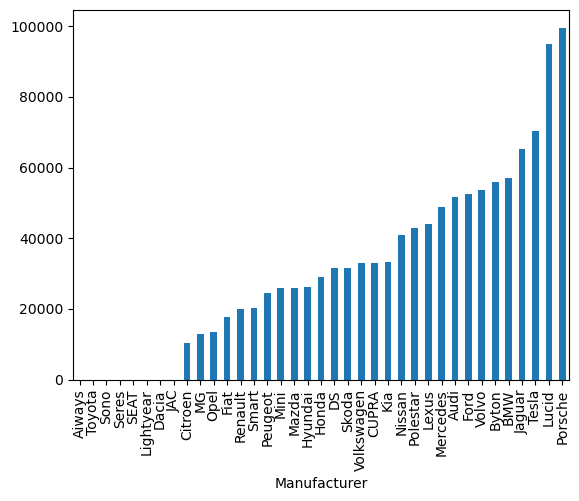

In [22]:
# Average price in Pounds
avg_price_pounds = sorted_range_uk_df.groupby('Manufacturer').mean()['Pricein£']
avg_price_pounds.sort_values().plot(kind='bar')



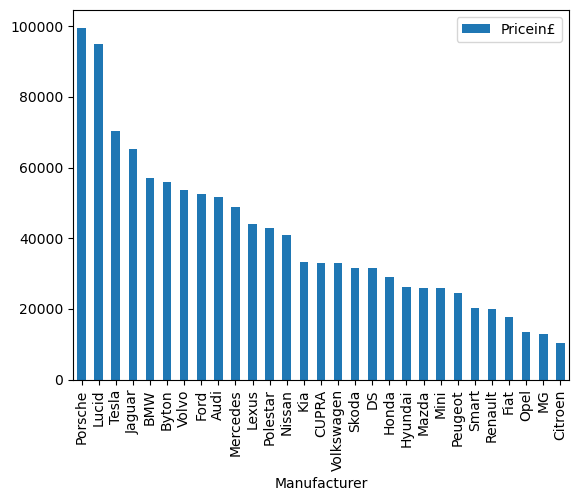

In [23]:
# Price in pounds
avg_pound=pd.DataFrame(avg_price_pounds, columns = ['Pricein£'])
avg_pound = avg_pound[avg_pound['Pricein£']!=0]
avg_pound.sort_values(by='Pricein£', ascending=False).plot(kind='bar') 
plt.savefig("AveragePriceInPounds.png")
plt.show()
# add save fig
# create same but in euros as well

In [14]:
# Take new_data_germany + sorting function
sorted_range_germany_df = new_data_germany.sort_values(by=['Range(km)'])
sorted_range_germany_df

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€
41,Smart,Smart EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19120
40,Smart,Smart EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21720
39,Smart,Smart EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,18460
64,Renault,Renault Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,24790
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0
...,...,...,...,...,...,...,...,...,...,...,...
150,Mercedes,Mercedes EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529
149,Mercedes,Mercedes EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374
90,Lucid,Lucid Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000
59,Tesla,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000


<AxesSubplot:xlabel='Manufacturer'>

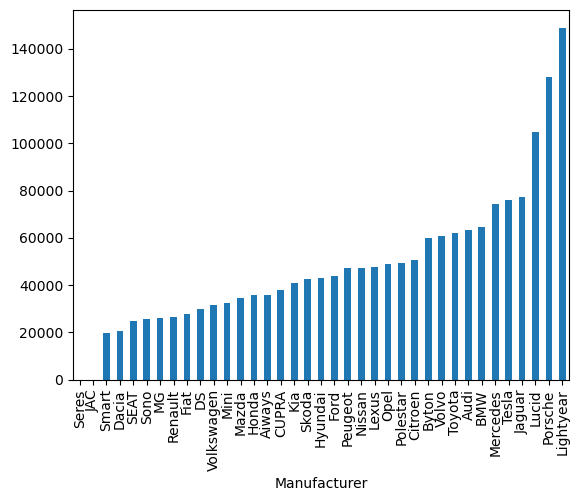

In [15]:
# Average price in Euros
avg_price_euros = sorted_range_germany_df.groupby('Manufacturer').mean()['Pricein€']
avg_price_euros.sort_values().plot(kind='bar')

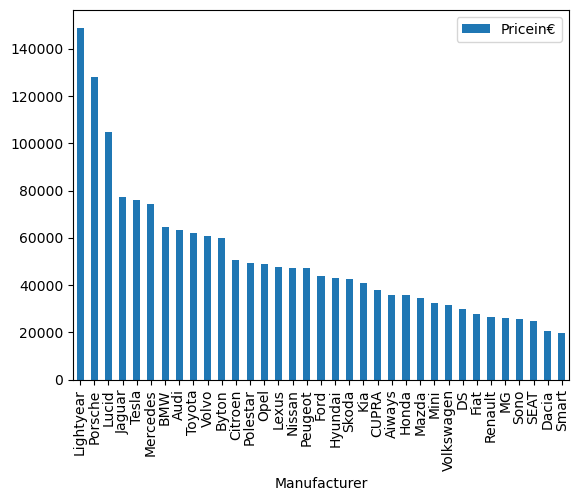

In [36]:
# Price in Euros
avg_euro=pd.DataFrame(avg_price_euros, columns = ['Pricein€'])
avg_euro = avg_euro[avg_euro['Pricein€']!=0]
avg_euro.sort_values(by='Pricein€', ascending=False).plot(kind='bar') 
plt.savefig("AvgPriceEuros.png")
plt.show()

# add save fig
# create same but in euros as well

In [17]:
# Take new_data_germany + sorting function
sorted_range_germany_df = new_data_germany.sort_values(by=['Range(km)'])
sorted_range_germany_df

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€
41,Smart,Smart EQ forfour,16.7,12.7,130,95,176,0,Rear Wheel Drive,4,19120
40,Smart,Smart EQ fortwo cabrio,16.7,11.9,130,95,176,0,Rear Wheel Drive,2,21720
39,Smart,Smart EQ fortwo coupe,16.7,11.6,130,100,167,0,Rear Wheel Drive,2,18460
64,Renault,Renault Twingo Electric,21.3,12.6,135,130,164,0,Rear Wheel Drive,4,24790
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0
...,...,...,...,...,...,...,...,...,...,...,...
150,Mercedes,Mercedes EQS 580 4MATIC,107.8,4.3,210,610,177,800,All Wheel Drive,5,135529
149,Mercedes,Mercedes EQS 450+,107.8,6.2,210,640,168,840,Rear Wheel Drive,5,106374
90,Lucid,Lucid Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,140000
59,Tesla,Tesla Cybertruck Tri Motor,200.0,3.0,210,750,267,710,All Wheel Drive,7,75000


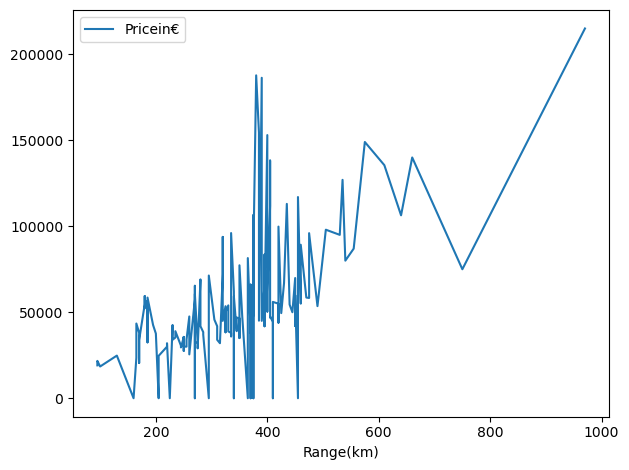

In [37]:
# Create bar charts 'Model VS Range(km)' from sorted range Germany
sorted_range_germany_df.plot.line(x= 'Range(km)', y= 'Pricein€')
plt.tight_layout()
plt.savefig("ModelVsRangeEuros.png")

plt.show()

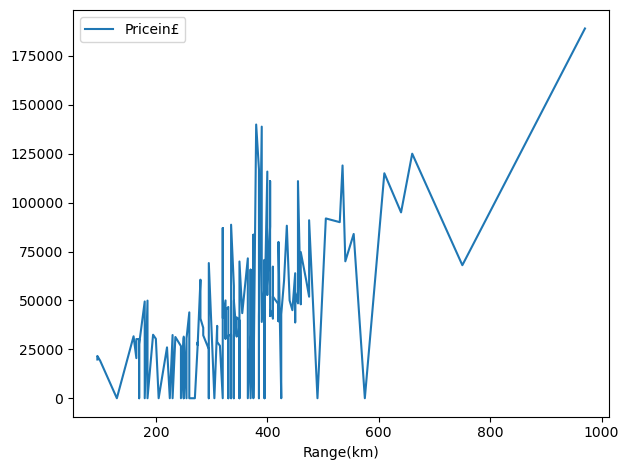

In [38]:
# Create bar charts 'Model VS Range(km)' from sorted range UK
sorted_range_uk_df.plot.line(x= 'Range(km)', y= 'Pricein£')
plt.tight_layout()
plt.savefig("ModelVsRangePounds.png")

plt.show()

# Sort the 'price comparison' by 'Low' and 'High'

In [26]:
# take the new_data_uk and sort price in pounds 
sorted_price_uk_df = new_data_uk.sort_values(by=['Pricein£'])
sorted_price_uk_df

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein£
0,Opel,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,0
110,Opel,Opel Zafira-e Life M 75 kWh,68.0,13.3,130,270,252,290,Front Wheel Drive,7,0
108,Opel,Opel Zafira-e Life M 50 kWh,45.0,12.1,130,185,243,250,Front Wheel Drive,7,0
107,Opel,Opel Zafira-e Life S 50 kWh,45.0,12.1,130,185,243,250,Front Wheel Drive,7,0
106,Citroen,Citroen e-SpaceTourer XL 75 kWh,68.0,13.3,130,270,252,290,Front Wheel Drive,7,0
...,...,...,...,...,...,...,...,...,...,...,...
124,Tesla,Tesla Model S Plaid,90.0,2.1,322,535,168,800,All Wheel Drive,5,118980
90,Lucid,Lucid Air Grand Touring,110.0,3.2,270,660,167,1380,All Wheel Drive,5,125000
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,138830
136,Porsche,Porsche Taycan Turbo S Cross Turismo,83.7,2.9,250,380,220,790,All Wheel Drive,4,139910


In [27]:
# take the new_data_germany and sort price in euros
sorted_price_germany_df = new_data_germany.sort_values(by=['Pricein€'])
sorted_price_germany_df

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,Pricein€
119,Seres,Seres 3,52.0,8.9,155,270,193,390,Front Wheel Drive,5,0
1,Renault,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0
128,JAC,JAC iEV7s,39.0,12.0,132,225,173,160,Front Wheel Drive,5,0
3,Audi,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0
177,MG,MG MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0
...,...,...,...,...,...,...,...,...,...,...,...
38,Porsche,Porsche Taycan Turbo,83.7,3.2,260,400,209,840,All Wheel Drive,4,153016
135,Porsche,Porsche Taycan Turbo Cross Turismo,83.7,3.3,250,385,217,800,All Wheel Drive,4,154444
4,Porsche,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336
136,Porsche,Porsche Taycan Turbo S Cross Turismo,83.7,2.9,250,380,220,790,All Wheel Drive,4,187746


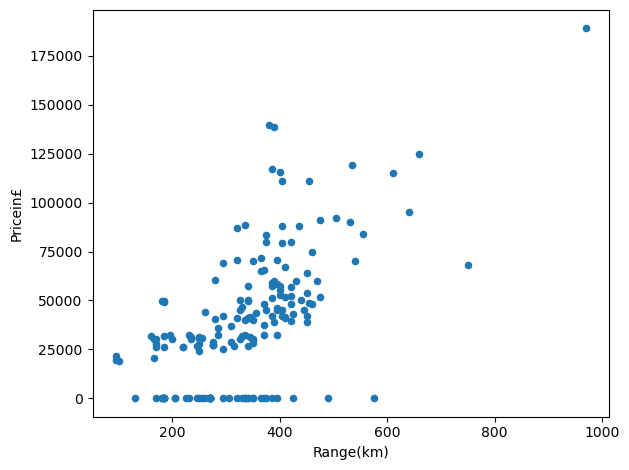

In [28]:
# Create bar charts 'Model VS Price' in Pounds UK
uk_price_plot = sorted_price_uk_df.plot.scatter(x= 'Range(km)', y= 'Pricein£')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Range(km)', ylabel='Pricein€'>

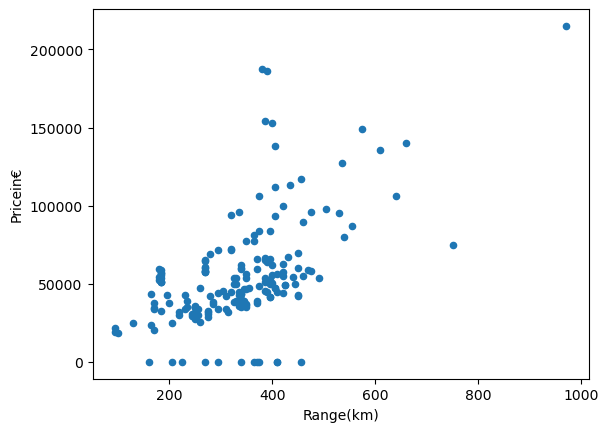

In [29]:
# Create bar charts 'Model VS Price' in Euros Germany
sorted_price_germany_df.plot.scatter(x= 'Range(km)', y= 'Pricein€')

# Display the correlation and linear regression in 'Range(km)' VS 'Price'

In [30]:
# Take sorted_price_uk_df + corr of price in pound and range
corr_uk_range_price = sorted_price_uk_df.corr()


# Take sorted_price_germany_df + corr of price in euros and range
corr_germany_range_price = sorted_price_germany_df.corr()

In [31]:
# Define a function to create Linear Regression plots

def plotlnreg(x_values, y_values, figtitle, title, text_coords,fig): 
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coords,fontsize=15,color="red")
    plt.title(figtitle)
    plt.xlabel('Range(km)')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(fig)
    plt.show()
    

The r-squared is: 0.38533931139444816


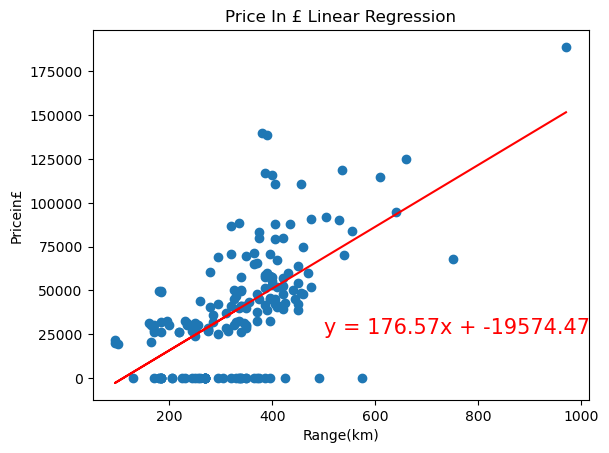

In [34]:
# Price in £ Liean Regression
x_values= sorted_price_uk_df['Range(km)']
y_values= sorted_price_uk_df['Pricein£']
plotlnreg(x_values, y_values, 'Price In £ Linear Regression', 'Pricein£', (500, 25000), 'LinearRegPounds.png')



The r-squared is: 0.3238030933180587


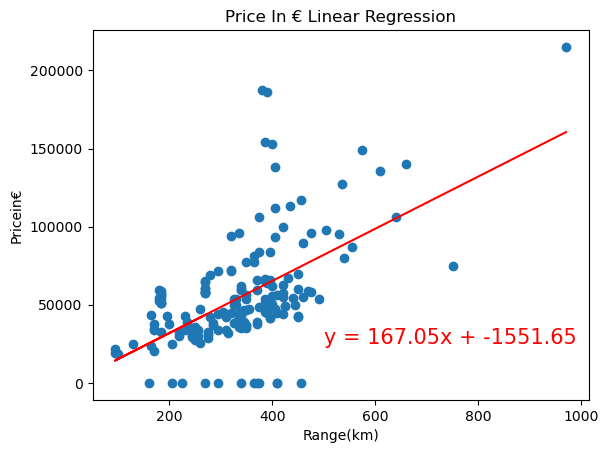

In [35]:
# Price in € Liean Regression
x_values= sorted_price_germany_df['Range(km)']
y_values= sorted_price_germany_df['Pricein€']
plotlnreg(x_values, y_values, 'Price In € Linear Regression', 'Pricein€', (500, 25000), 'LinregEuros.png')

